Imagenet: 
* Large dataset of images 
* Lots of deep learning models have been trained on this dataset
* We will be using one of the models trained on this dataset for our classification task

Pytorch Vision transform: <br>
* **torchvision.transforms** is a module that provides common image transformations. <br>
* They can be chained together using **Compose**.

We will be doing the following transforms on the **train** split: 
1. RandomResizedCrop : A crop of random size (default: of 0.08 to 1.0) of the original size and a random aspect ratio (default: of 3/4 to 4/3) of the original aspect ratio is made. This crop is finally resized to given size. 
2. RandomHorizontalFlip : Horizontally flip the given image randomly with a given probability. 
3. RandomVerticalFlip : Vertically flip the given image randomly with a given probability.
4. ToTensor : Convert a PIL Image or numpy.ndarray to tensor. This transform does not support torchscript.
5. Normalize : Normalize a tensor image with mean and standard deviation. 


In [3]:
from IPython.display import Image

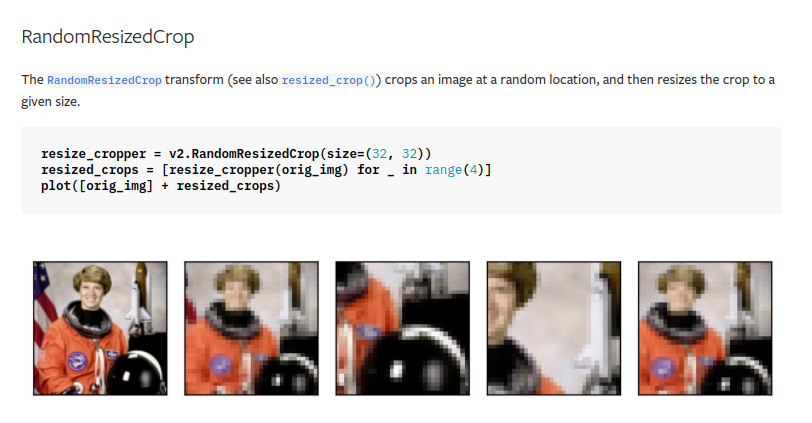

In [5]:
Image(filename='/home/nirzaree/Pictures/Screenshot from 2024-09-04 18-35-49.png') 

In [1]:
from torchvision import transforms

In [7]:
input_size = 224
imagenet_mean,imagenet_std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

In [8]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(input_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean,imagenet_std)
    ]
)

We will be doing the following transforms on the **val** and **test** split: 
1. Resize : 
2. CenterCrop : Horizontally flip the given image randomly with a given probability. 
3. ToTensor : Convert a PIL Image or numpy.ndarray to tensor. This transform does not support torchscript.
4. Normalize : Normalize a tensor image with mean and standard deviation. 

In [9]:
val_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.CenterCrop(input_size),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean,imagenet_std)
    ]
)

test_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.CenterCrop(input_size),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean,imagenet_std)
    ]
)

### Load the data into ImageFolder class 
https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html

About **ImageFolder** : A generic data loader where the images are arranged in this way by default:

root/dog/xxx.png  
root/dog/xxy.png  
root/dog/[...]/xxz.png  

root/cat/123.png  
root/cat/nsdf3.png  
root/cat/[...]/asd932_.png  

In [14]:
datadir = 'data/EuroSAT/2750/'

In [13]:
from torchvision import datasets

In [15]:
dataset = datasets.ImageFolder(datadir)

In [23]:
dataset

Dataset ImageFolder
    Number of datapoints: 27000
    Root location: data/EuroSAT/2750/

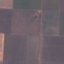

In [22]:
dataset[0][0]

In [24]:
dataset.classes

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [25]:
len(dataset.classes)

10

### Create custom Dataset class for the given data 


In [26]:
from torch.utils import data

In [28]:
class EuroSAT(data.Dataset):
    def __init__(self,dataset,transform = None):
        self.dataset = dataset
        self.transform = transform

    def __getitem__(self,index):
        if self.transform:
            x = self.transform(dataset[index][0])
        else:
            x = dataset[index][0]
        y = dataset[index][1]
        return x,y
    
    def __len__(self):
        return len(dataset)


Apply 70:15:15 train:val:test split to the data

In [29]:
train_data = EuroSAT(dataset,train_transform) 
val_data = EuroSAT(dataset,val_transform)
test_data = EuroSAT(dataset,test_transform)

In [32]:
train_size = 0.70
val_size = 0.15

In [33]:
len(dataset)

27000

In [39]:
indices = list(range(len(dataset)))

In [40]:
train_split = int(train_size * len(dataset))
val_split = int(val_size * len(dataset))

In [41]:
import numpy as np

In [42]:
np.random.shuffle(indices)

In [44]:
# indices

In [45]:
train_data = data.Subset(train_data,indices = indices[:train_split])
val_data =  data.Subset(val_data,indices = indices[train_split:train_split + val_split])
test_data = data.Subset(test_data,indices = indices[train_split + val_split:])

In [47]:
print(len(train_data),len(val_data),len(test_data))

18900 4050 4050


In [57]:
# train_data[0][0].numpy()

In [54]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


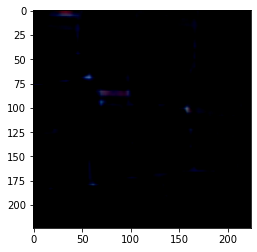

In [59]:
plt.imshow(train_data[0][0].numpy().T) #why transpose: https://stackoverflow.com/questions/65324466/typeerror-invalid-shape-3-32-32-for-image-data-showing-a-colored-image-in

Now create a DataLoader

In [ ]:
num_workers = 2
batch_size = 16

train_loader = data.DataLoader(
    train_data,
    batch_size = batch_size,
    shuffle = True
)

val_loader = data.DataLoader(
    val_data,
    batch_size = batch_size,
    shuffle = True
)

train_loader = data.DataLoader(
    train_data,
    batch_size = batch_size,
    shuffle = True
)